In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import scipy
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
unigram_df = pd.read_csv('data/whole_unigram.csv')
bigram_df = pd.read_csv('data/v1chov2_bi.csv')

In [3]:
pd.set_option('display.max_columns', 212)
pd.set_option('display.max_info_columns', 212)
pd.set_option('display.max_rows', 400)

In [4]:
unigram_df.head()

,AudioFilename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,tempo,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,emotion,newKey,LyricsFilename,Emotion,Em_category,along,alright,alway,anorth,around,away,baby,back,beat,believe,best,better,boy,break,breath,bring,broken,burn,call,care,chang,close,cold,come,could,crazy,cry,dance,dark,day,die,doe,done,down,dream,end,enough,even,ever,every,eye,face,fall,far,fear,feel,fight,find,forget,found,friend,get,girl,give,go,gon,gone,good,got,guess,ha,hand,hard,hate,head,hear,heart,help,hide,high,hit,hold,home,hope,hurt,inside,keep,kiss,knew,know,last,late,leave,left,let,lie,life,light,like,little,live,long,look,lose,lost,love,made,make,man,may,mean,might,mind,mine,miss,more,move,much,name,need,never,new,night,no,not,old,one,pain,part,place,play,plea,postcornu,precious,put,really,remember,right,run,said,say,see,seem,show,side,sing,sky,sleep,smile,someone,song,soul,stand,star,start,stay,still,stop,ta,take,talk,tear,tell,thing,think,thought,time,told,tonight,touch,tri,true,turn,two,up,use,wa,wait,walk,want,watch,way,well,wish,without,word,world,would,wrong
0,hi5_audio.wav,0.353255,0.065734,2426.510689,2567.402911,5168.367039,0.102177,135.999178,-184.056198,82.353661,9.733582,37.788139,0.382570,1.310104,8.749880,8.020605,-4.113838,9.479920,-7.809608,2.711373,-1.244403,6.398881,1.046468,2.397381,-0.227114,1.798451,-4.627503,-0.119414,Happy,hi5,hi5_lyrics.txt,Happy,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.124618,0.000000,0.0,0.151823,0.000000,0.0,0.0,0.072356,0.0,0.036769,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.079048,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.651414,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.14524,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.183723,0.190844,0.0,0.000000,0.0,0.0,0.346798,0.0,0.000000,0.000000,0.0,0.232824,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.123697,0.000000,0.0,0.046100,0.000000,0.000000,0.052635,0.0,0.228907,0.0,0.0,0.086081,0.0,0.0,0.040257,0.0,0.000000,0.0,0.037746,0.00000,0.178826,0.000000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.185681,0.0,0.0,0.0,0.025799,0.000000,0.0,0.000000,0.000000,0.031282,0.0,0.071494,0.000000,0.0,0.0,0.0,0.186259,0.0,0.0,0.022709,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.216770,0.0,0.0,0.141555,0.000000
1,hb6_audio.wav,0.397813,0.076431,3024.198395,2861.016222,6448.778307,0.144036,151.999081,-161.710358,61.727833,30.846767,42.929890,0.335082,5.293347,6.258444,17.711990,-1.163299,4.563015,-4.967712,2.030528,-2.803688,5.412632,-3.397838,3.998500,-4.155987,6.109692,-2.910591,-1.017200,Happy,hb6,hb6_lyrics.txt,Happy,0,0.110959,0.0,0.000000,0.0,0.0,0.0,0.000000,0.092197,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.197504,0.0,0.000000,0.0,0.171269,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.115362,0.0,0.0,0.000000,0.00000,0.681944,0.000000,0.153062,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.123647,0.0,0.000000,0.0,0.09357,0.000000,0.142831,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.072294,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.069819,0.0,0.084491,0.000000,0.0,0.000000,0.000000,0.000000,0.152677,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.140686,0.0,0.000000,0.000000,0.139653,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.273387,0.0,0.121588,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.28789,0.0,0.0,0.0,0.0,0.0,0.000000,0.132175,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,

In [5]:
bigram_df.head()

,Audioverse1Fn,chroma_stft_x,rmse_x,spectral_centroid_x,spectral_bandwidth_x,rolloff_x,zero_crossing_rate_x,tempo_x,mfcc1_x,mfcc2_x,mfcc3_x,mfcc4_x,mfcc5_x,mfcc6_x,mfcc7_x,mfcc8_x,mfcc9_x,mfcc10_x,mfcc11_x,mfcc12_x,mfcc13_x,mfcc14_x,mfcc15_x,mfcc16_x,mfcc17_x,mfcc18_x,mfcc19_x,mfcc20_x,emotion_x,newKey,Lyricsverse1Fn,Emotion_x,Em_category_x,along,away_x,back_x,come_x,could_x,day_x,down_x,every_x,eye,feel_x,friend,get_x,girl_x,go_x,got_x,heart_x,hold,know_x,let_x,like_x,love_x,make_x,need_x,never_x,night_x,no_x,not_x,one_x,right_x,say_x,see_x,take_x,tell_x,thing_x,think_x,time_x,tri,up_x,wa_x,want_x,way_x,would_x,AudioChorusFn,chroma_stft_y,rmse_y,spectral_centroid_y,spectral_bandwidth_y,rolloff_y,zero_crossing_rate_y,tempo_y,mfcc1_y,mfcc2_y,mfcc3_y,mfcc4_y,mfcc5_y,mfcc6_y,mfcc7_y,mfcc8_y,mfcc9_y,mfcc10_y,mfcc11_y,mfcc12_y,mfcc13_y,mfcc14_y,mfcc15_y,mfcc16_y,mfcc17_y,mfcc18_y,mfcc19_y,mfcc20_y,emotion_y,LyricsChorusFn,Emotion_y,Em_category_y,baby,come_y,down_y,feel_y,get_y,give,go_y,heart_y,know_y,let_y,like_y,love_y,make_y,need_y,never_y,not_y,one_y,say_y,see_y,take_y,time_y,up_y,wa_y,want_y,way_y,would_y,Audioverse2Fn,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,tempo,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,emotion,Lyricsverse2Fn,Emotion,Em_category,away_y,back_y,come,could_y,day_y,down,every_y,fall,feel,get,girl_y,go,got_y,heart,know,let,life,like,look,love,make,mind,need,never,night_y,no_y,not,one,right_y,say,see,still,take,tell_y,thing_y,think_y,time,up,wa,want,way,would
0,ahb3_verse1.wav,0.434022,0.067898,2917.643724,2838.563285,6254.943809,0.147130,129.199219,-184.086761,80.446686,37.210545,32.195625,-5.024558,2.092282,-4.173722,13.037381,-3.125153,2.738574,-5.025649,-1.239310,-0.521206,2.082359,-0.754492,2.793242,0.806390,4.629819,-4.341207,-0.493857,Happy,hb3,lhb3_verse1.txt,Happy,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.248858,0.0,0.0,0.0,0.000000,0.000000,0.450533,0.000000,0.0,0.0,0.0,0.269367,0.000000,0.215579,0.510299,0.261955,0.251944,0.275393,0.0,0.128206,0.000000,0.000000,0.244433,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.267451,ahb3_chorus1.wav,0.355865,0.116165,2869.048964,2865.448596,6335.914741,0.128238,99.384014,-80.488075,74.271301,13.758913,22.105656,-5.240357,5.044490,4.283922,13.736154,-4.493423,3.182016,2.673777,0.688013,-0.432465,4.635282,6.562485,5.403377,5.448026,4.126121,-0.074000,1.326142,Happy,lhb3_chorus1.txt,Happy,0,0.953359,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.107317,0.202592,0.196333,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,ahb3_verse2.wav,0.423800,0.091260,2915.863430,2894.065278,6470.413186,0.136014,129.199219,-99.822502,75.645203,26.087381,33.068001,-8.253392,0.294019,1.406046,9.125345,-6.693459,3.048758,-7.297853,-0.066175,-2.600434,1.876869,-0.243305,3.569081,0.277265,3.658201,-4.548369,2.295941,Happy,lhb3_verse2.txt,Happy,0,0.0,0.0,0.0,0.0,0.518151,0.000000,0.442865,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.317556,0.000000,0.000000,0.000000,0.000000,0.0,0.454515,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.477457,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
1,aha4_verse1.wav,0.425582,0.093563,2575.290390,2787.879078,5781.936997,0.105168,123.046875,-139.417511,82.753807,34.161961,36.340389,-1.053595,7.057381,5.540234,14.629681,1.323657,1.859510,-1.141047,1.362411,-2.035685,2.490664,-3.177919,2.619955,-4.353766,2.913755,-0.458400,1.904187,Happy,ha4,lha4_verse1.txt,Happy,0,0.0,0.0,0.377068,0.000000,0.000000,0.387905,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.290675,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.366581,0.000000,0.000000,0.698910,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,aha4_chorus1.wav,0.385739,0.100094,2503.821547,2799.089789,5734.491013,0.099758,117.453835,-134.138535,85.734398,38.497219,34.201870

In [6]:
unigram_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 212 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    AudioFilename       400 non-null    object 
 1    chroma_stft         400 non-null    float64
 2    rmse                400 non-null    float64
 3    spectral_centroid   400 non-null    float64
 4    spectral_bandwidth  400 non-null    float64
 5    rolloff             400 non-null    float64
 6    zero_crossing_rate  400 non-null    float64
 7    tempo               400 non-null    float64
 8    mfcc1               400 non-null    float64
 9    mfcc2               400 non-null    float64
 10   mfcc3               400 non-null    float64
 11   mfcc4               400 non-null    float64
 12   mfcc5               400 non-null    float64
 13   mfcc6               400 non-null    float64
 14   mfcc7               400 non-null    float64
 15   mfcc8               400 non-null    fl

In [7]:
bigram_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 207 columns):
 #    Column                Non-Null Count  Dtype  
---   ------                --------------  -----  
 0    Audioverse1Fn         400 non-null    object 
 1    chroma_stft_x         400 non-null    float64
 2    rmse_x                400 non-null    float64
 3    spectral_centroid_x   400 non-null    float64
 4    spectral_bandwidth_x  400 non-null    float64
 5    rolloff_x             400 non-null    float64
 6    zero_crossing_rate_x  400 non-null    float64
 7    tempo_x               400 non-null    float64
 8    mfcc1_x               400 non-null    float64
 9    mfcc2_x               400 non-null    float64
 10   mfcc3_x               400 non-null    float64
 11   mfcc4_x               400 non-null    float64
 12   mfcc5_x               400 non-null    float64
 13   mfcc6_x               400 non-null    float64
 14   mfcc7_x               400 non-null    float64
 15   mfcc

In [8]:
################################
###### UNIGRAM DATAFRAME #######
################################

<AxesSubplot:title={'center':'chroma_stft'}, xlabel='emotion'>

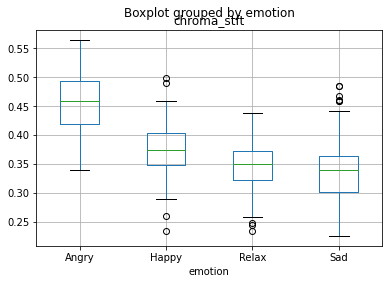

In [9]:
#VISUALIZATION


#boxplot
unigram_df.boxplot(column=['chroma_stft'], by='emotion')

array([[<AxesSubplot:title={'center':'chroma_stft'}>,
        <AxesSubplot:title={'center':'rmse'}>]], dtype=object)

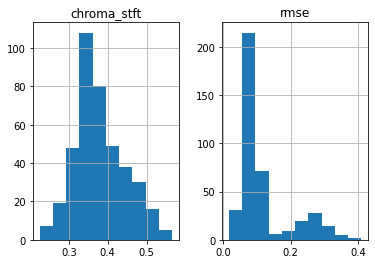

In [10]:
#histogram
unigram_df.hist(column=['chroma_stft','rmse'])

In [11]:
#CORRELATION MATRIX
unigram_correlation = unigram_df.corr()
print(unigram_correlation)

                    chroma_stft      rmse  spectral_centroid  \
chroma_stft            1.000000 -0.073452           0.596151   
rmse                  -0.073452  1.000000          -0.269554   
spectral_centroid      0.596151 -0.269554           1.000000   
spectral_bandwidth     0.408777  0.126083           0.799490   
rolloff                0.528799 -0.120383           0.957391   
zero_crossing_rate     0.556875 -0.468948           0.916916   
tempo                 -0.032776  0.004506           0.000210   
mfcc1                  0.533574  0.390753           0.587627   
mfcc2                 -0.663076  0.234603          -0.953382   
mfcc3                 -0.422641  0.453080          -0.500375   
mfcc4                  0.445696 -0.539722           0.274601   
mfcc5                 -0.198944  0.839389          -0.439791   
mfcc6                  0.322202  0.474706          -0.030478   
mfcc7                  0.364299 -0.253151           0.150886   
mfcc8                  0.529043  0.01063

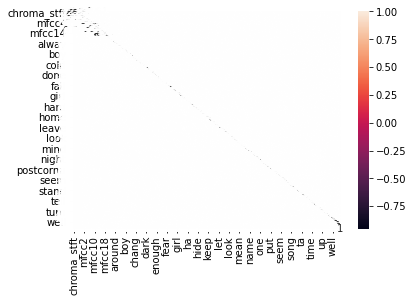

In [12]:
#correlation matrix
sn.heatmap(unigram_correlation, annot=True)
plt.show()

In [13]:
# remove white space
unigram_df.columns = unigram_df.columns.str.lower()
trimmed_unigram_df = unigram_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

count_list = []
duplicate_values = []

for x in range(len(trimmed_unigram_df.columns)):
#     print("this is x : ", data_frame_trimmed_whole_unigram_data_frame.columns.values[x])
    column_list = []
    col = trimmed_unigram_df.iloc[:, x]
    col_name = trimmed_unigram_df.columns.values[x]
    col_to_compare = trimmed_unigram_df[col_name]
    
    for j in range(len(trimmed_unigram_df.columns)):
#         print("this is j", data_frame_trimmed_whole_unigram_data_frame.columns.values[j])
        
        nextCol = trimmed_unigram_df.iloc[:, j]
        nextCol_name = trimmed_unigram_df.columns.values[j]
        nextCol_to_compare = trimmed_unigram_df[nextCol_name]
        
        
        if col_to_compare.equals(nextCol_to_compare):
            column_list.append('True')
            
        
            if len(column_list) >= 2:
                duplicate_values.append(col_name)
                
# the duplicate column, dict removes all duplicate words
duplicate_values = list(dict.fromkeys(duplicate_values))
print(duplicate_values)

# remove the duplicate column
trimmed_unigram_df.drop(columns = duplicate_values, inplace=True)
unigram_df = trimmed_unigram_df

['emotion']


In [14]:
unigram_df = unigram_df.drop(['audiofilename','newkey','lyricsfilename'], axis=1)

In [15]:
#STATISTICAL DESCRIPTION
unigram_df.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,tempo,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,em_category,along,alright,alway,anorth,around,away,baby,back,beat,believe,best,better,boy,break,breath,bring,broken,burn,call,care,chang,close,cold,come,could,crazy,cry,dance,dark,day,die,doe,done,down,dream,end,enough,even,ever,every,eye,face,fall,far,fear,feel,fight,find,forget,found,friend,get,girl,give,go,gon,gone,good,got,guess,ha,hand,hard,hate,head,hear,heart,help,hide,high,hit,hold,home,hope,hurt,inside,keep,kiss,knew,know,last,late,leave,left,let,lie,life,light,like,little,live,long,look,lose,lost,love,made,make,man,may,mean,might,mind,mine,miss,more,move,much,name,need,never,new,night,no,not,old,one,pain,part,place,play,plea,postcornu,precious,put,really,remember,right,run,said,say,see,seem,show,side,sing,sky,sleep,smile,someone,song,soul,stand,star,start,stay,still,stop,ta,take,talk,tear,tell,thing,think,thought,time,told,tonight,touch,tri,true,turn,two,up,use,wa,wait,walk,want,watch,way,well,wish,without,word,world,would,wrong
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.379306,0.118482,2489.868020,2588.826650,5306.549265,0.107115,118.682189,-172.561334,82.016725,22.720246,33.675174,5.916460,-0.093123,4.523578,10.640361,-3.600156,3.518754,-3.956476,1.891536,-1.590583,2.097641,-0.024149,2.683664,-3.030415,2.556318,-3.100277,0.327551,1.500000,0.021567,0.015963,0.021081,0.013715,0.015562,0.037804,0.047476,0.035375,0.011186,0.023177,0.013588,0.017395,0.013641,0.022301,0.013411,0.023818,0.013255,0.015163,0.019511,0.013378,0.015739,0.014157,0.009682,0.050715,0.031862,0.009185,0.017159,0.026553,0.022995,0.

In [16]:
#COVARIANCE MATRIX
print(np.cov(unigram_df, bias=True))

[[187163.3073435  229231.80706926 138126.88884417 ... 260911.85600452
  186632.67986148 213104.92356522]
 [229231.80706926 281256.33627058 168603.20334443 ... 320184.56622126
  228486.81347079 261316.61728429]
 [138126.88884417 168603.20334443 102619.03711734 ... 191908.49612918
  137911.75636162 156907.16079223]
 ...
 [260911.85600452 320184.56622126 191908.49612918 ... 364993.27168855
  260459.35267923 297350.11047659]
 [186632.67986148 228486.81347079 137911.75636162 ... 260459.35267923
  186479.81374874 212327.70921771]
 [213104.92356522 261316.61728429 156907.16079223 ... 297350.11047659
  212327.70921771 242937.94977699]]


In [17]:
unigram_x = unigram_df.values
unigram_y = unigram_df['em_category'].values
unigram_x = np.delete(unigram_x,27,axis=1)

In [18]:
#CLASSIFIER SCORE
X_train_unigram, X_test_unigram, Y_train_unigram, Y_test_unigram = train_test_split(unigram_x, unigram_y, test_size=0.2, random_state=0)

nb_clf = GaussianNB()
nb_clf.fit(X_train_unigram, Y_train_unigram)
nb_clf.score(X_test_unigram, Y_test_unigram)

0.4875

In [19]:
#CLASSIFIER PERFORMANCE
predictions = nb_clf.predict(X_test_unigram)

print(accuracy_score(Y_test_unigram, predictions))
print(confusion_matrix(Y_test_unigram, predictions))
print(classification_report(Y_test_unigram, predictions))

0.4875
[[13  3  4  3]
 [ 4 15  4  0]
 [ 2  3  6  5]
 [ 6  1  6  5]]
              precision    recall  f1-score   support

           0       0.52      0.57      0.54        23
           1       0.68      0.65      0.67        23
           2       0.30      0.38      0.33        16
           3       0.38      0.28      0.32        18

    accuracy                           0.49        80
   macro avg       0.47      0.47      0.47        80
weighted avg       0.49      0.49      0.49        80



In [20]:
################################
####### BIGRAM DATAFRAME #######
################################

<AxesSubplot:title={'center':'chroma_stft_x'}, xlabel='emotion'>

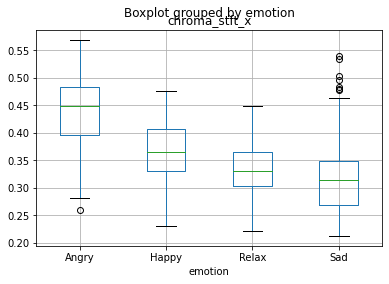

In [21]:
#VISUALIZATION


#boxplot
bigram_df.boxplot(column=['chroma_stft_x'], by='emotion')

array([[<AxesSubplot:title={'center':'chroma_stft_x'}>,
        <AxesSubplot:title={'center':'rmse_x'}>]], dtype=object)

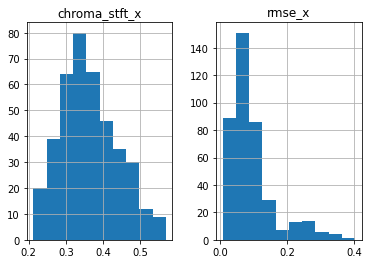

In [22]:
#histogram
bigram_df.hist(column=['chroma_stft_x', 'rmse_x'])

In [23]:
#CORRELATION MATRIX
bigram_correlation = bigram_df.corr()
print(bigram_correlation)

                      chroma_stft_x    rmse_x  spectral_centroid_x  \
chroma_stft_x              1.000000  0.195204             0.496784   
rmse_x                     0.195204  1.000000            -0.154195   
spectral_centroid_x        0.496784 -0.154195             1.000000   
spectral_bandwidth_x       0.478251  0.071041             0.873528   
rolloff_x                  0.496357 -0.074100             0.970273   
zero_crossing_rate_x       0.398799 -0.318650             0.907610   
tempo_x                   -0.020700 -0.046486             0.086220   
mfcc1_x                    0.689806  0.416810             0.623559   
mfcc2_x                   -0.547500  0.062531            -0.929578   
mfcc3_x                   -0.224802  0.343613            -0.353766   
mfcc4_x                    0.409863 -0.244011             0.173936   
mfcc5_x                   -0.102976  0.663618            -0.429231   
mfcc6_x                    0.384228  0.471120            -0.098356   
mfcc7_x             

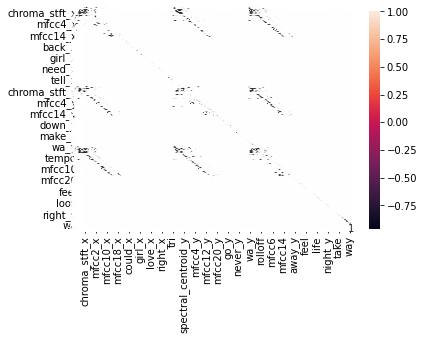

In [24]:
#correlation matrix
sn.heatmap(bigram_correlation, annot=True)
plt.show()

In [25]:
# remove white space
bigram_df.columns = bigram_df.columns.str.lower()
trimmed_bigram_df = bigram_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


count_list = []
duplicate_values = []

for x in range(len(trimmed_bigram_df.columns)):
#     print("this is x : ", data_frame_trimmed_whole_unigram_data_frame.columns.values[x])
    column_list = []
    col = trimmed_bigram_df.iloc[:, x]
    col_name = trimmed_bigram_df.columns.values[x]
    col_to_compare = trimmed_bigram_df[col_name]
    
    for j in range(len(trimmed_bigram_df.columns)):
#         print("this is j", data_frame_trimmed_whole_unigram_data_frame.columns.values[j])
        
        nextCol = trimmed_bigram_df.iloc[:, j]
        nextCol_name = trimmed_bigram_df.columns.values[j]
        nextCol_to_compare = trimmed_bigram_df[nextCol_name]

        if col_to_compare.equals(nextCol_to_compare) and (col_name == nextCol_name):
            column_list.append('True')
            
            if len(column_list) >= 2:
#                 print('COL NAME', col_name)
#                 print('NextCol NAME', nextCol_name)
                duplicate_values.append(col_name)
                
# the duplicate column, dict removes all duplicate words
duplicate_values = list(dict.fromkeys(duplicate_values))
print(duplicate_values)

# remove the duplicate column
trimmed_bigram_df.drop(columns = duplicate_values, inplace=True)
bigram_df = trimmed_bigram_df

['emotion_x', 'emotion_y', 'emotion']


In [26]:
bigram_df = bigram_df.drop(['audioverse1fn','newkey','lyricsverse1fn', 'audiochorusfn','lyricschorusfn','audioverse2fn', 'lyricsverse2fn'], axis=1)

In [27]:
bigram_df = bigram_df.drop(['em_category_x', 'em_category_y'], axis=1)

In [28]:
#STATISTICAL DESCRIPTION
bigram_df.describe()

,chroma_stft_x,rmse_x,spectral_centroid_x,spectral_bandwidth_x,rolloff_x,zero_crossing_rate_x,tempo_x,mfcc1_x,mfcc2_x,mfcc3_x,mfcc4_x,mfcc5_x,mfcc6_x,mfcc7_x,mfcc8_x,mfcc9_x,mfcc10_x,mfcc11_x,mfcc12_x,mfcc13_x,mfcc14_x,mfcc15_x,mfcc16_x,mfcc17_x,mfcc18_x,mfcc19_x,mfcc20_x,along,away_x,back_x,come_x,could_x,day_x,down_x,every_x,eye,feel_x,friend,get_x,girl_x,go_x,got_x,heart_x,hold,know_x,let_x,like_x,love_x,make_x,need_x,never_x,night_x,no_x,not_x,one_x,right_x,say_x,see_x,take_x,tell_x,thing_x,think_x,time_x,tri,up_x,wa_x,want_x,way_x,would_x,chroma_stft_y,rmse_y,spectral_centroid_y,spectral_bandwidth_y,rolloff_y,zero_crossing_rate_y,tempo_y,mfcc1_y,mfcc2_y,mfcc3_y,mfcc4_y,mfcc5_y,mfcc6_y,mfcc7_y,mfcc8_y,mfcc9_y,mfcc10_y,mfcc11_y,mfcc12_y,mfcc13_y,mfcc14_y,mfcc15_y,mfcc16_y,mfcc17_y,mfcc18_y,mfcc19_y,mfcc20_y,baby,come_y,down_y,feel_y,get_y,give,go_y,heart_y,know_y,let_y,like_y,love_y,make_y,need_y,never_y,not_y,one_y,say_y,see_y,take_y,time_y,up_y,wa_y,want_y,way_y,would_y,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,tempo,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,em_category,away_y,back_y,come,could_y,day_y,down,every_y,fall,feel,get,girl_y,go,got_y,heart,know,let,life,like,look,love,make,mind,need,never,night_y,no_y,not,one,right_y,say,see,still,take,tell_y,thing_y,think_y,time,up,wa,want,way,would
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.363797,0.093155,2357.695591,2478.129324,4934.712060,0.102298,118.334161,-224.843554,88.671445,26.593433,33.763854,8.199037,-0.755252,3.866462,8.729669,-4.415713,1.972050,-4.542380,1.208123,-2.091296,1.379212,-0.564242,1.371868,-4.010688,1.509649,-3.798935,-0.573028,0.037314,0.045562,0.039613,0.050224,0.039243,0.038674,0.052760,0.049037,0.039828,0.065837,0.030658,0.045794,0.036304,0.066379,0.054877,0.041817,0.028385,0.081874

In [29]:
#COVARIANCE MATRIX
print(np.cov(bigram_df, bias=True))

[[854617.71173703 785749.582831   861957.05470375 ... 742277.05408097
  840188.77716474 627511.94993396]
 [785749.582831   723128.56431407 792324.76768734 ... 682840.74179752
  772347.08071583 577887.02831947]
 [861957.05470375 792324.76768734 870649.06271037 ... 747713.1205692
  845501.15306982 631401.03805699]
 ...
 [742277.05408097 682840.74179752 747713.1205692  ... 650363.18076949
  731737.94502105 546320.10303027]
 [840188.77716474 772347.08071583 845501.15306982 ... 731737.94502105
  831989.81499553 621044.15253014]
 [627511.94993396 577887.02831947 631401.03805699 ... 546320.10303027
  621044.15253014 466379.45642068]]


In [30]:
bigram_x = bigram_df.values
bigram_y = bigram_df['em_category'].values
bigram_x = np.delete(bigram_x,149,axis=1)

In [31]:
#CLASSIFIER SCORE
X_train_bigram, X_test_bigram, Y_train_bigram, Y_test_bigram = train_test_split(bigram_x, bigram_y, test_size=0.2, random_state=0)

nb_clf = GaussianNB()
nb_clf.fit(X_train_bigram, Y_train_bigram)
nb_clf.score(X_test_bigram, Y_test_bigram)

0.6125

In [32]:
#CLASSIFIER PERFORMANCE
predictions = nb_clf.predict(X_test_bigram)

print(accuracy_score(Y_test_bigram, predictions))
print(confusion_matrix(Y_test_bigram, predictions))
print(classification_report(Y_test_bigram, predictions))

0.6125
[[15  5  3  0]
 [ 1 22  0  0]
 [ 1  1  5  9]
 [ 3  0  8  7]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.70        23
           1       0.79      0.96      0.86        23
           2       0.31      0.31      0.31        16
           3       0.44      0.39      0.41        18

    accuracy                           0.61        80
   macro avg       0.57      0.58      0.57        80
weighted avg       0.60      0.61      0.60        80

